<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Linear

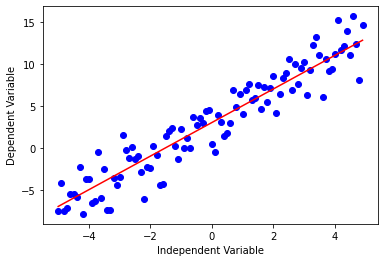

In [2]:
#a linear graph of function y=2x+3
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Cubic

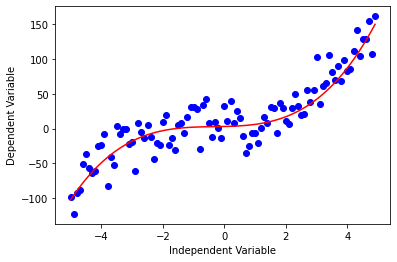

In [3]:
# a cubic function graph of y=x^3 + x^2 + x + 3
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Quadratic

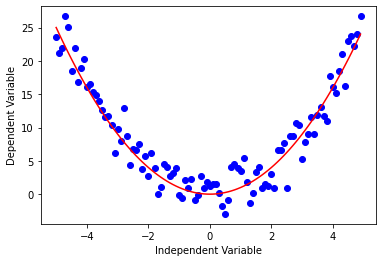

In [4]:
#quadratic function y=x^2
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Exponential

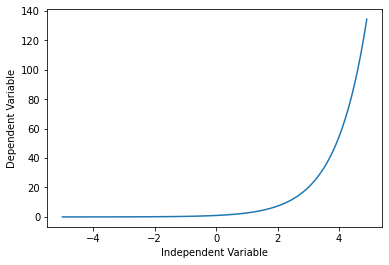

In [5]:
#exponential graph of y=a+bc^x
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Logarithmic

<ipython-input-6-5090b7d6dc1e>:4: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


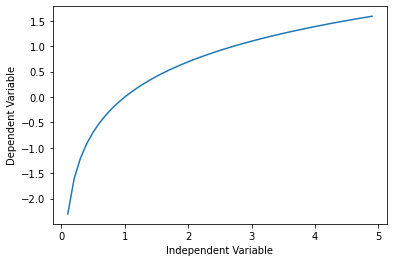

In [6]:
#y=log(x)
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Sigmoid/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

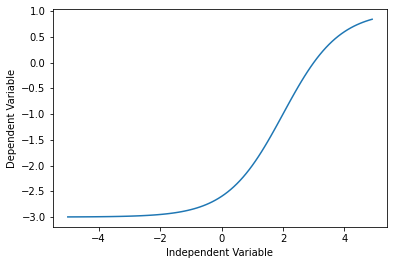

In [7]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Non Linear Regression Analysis

In [8]:
df=pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


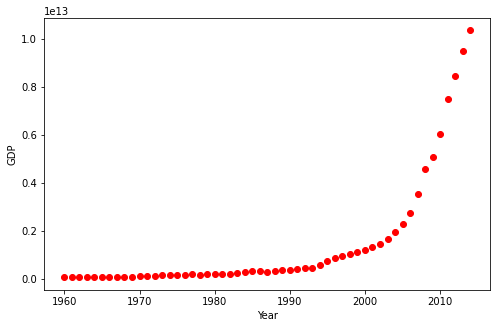

In [9]:
#plotting the dataset
plt.figure(figsize=(8,5))
x_data,y_data=(df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

#### Choosing a model

The plot shows a slow start and an increasing rate. Therefore a logistic function would be a good approximation <br>
The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.

#### Building the Model

In [10]:
def sigmoid(x,Beta_1,Beta_2):
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

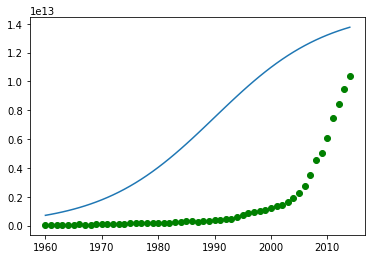

In [11]:
#lets check whether this might fit the data
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'go')
plt.show()

Our task here is to fine the best parameters. But first lets normalize the data values

In [12]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In order to find the best parameters for our line use curve fit from scipy module<br>
crurve-fit uses the method of least squared to fit the curve <br>
Least squares is a method for estimating the unknown parameters by minimizing the sum of squares  of the differences between the observed dependent variable and those predicted <br> 

In [13]:
from scipy.optimize import curve_fit

In [14]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


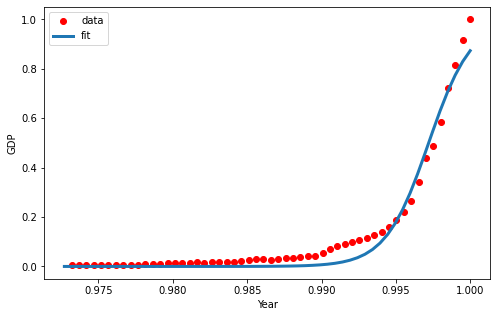

In [15]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()